In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

In [2]:
# Read CSV file into DF
airline_df = pd.read_csv("Resources/Airline_Delay_cause.csv")

In [3]:
# Display beggining of DataFrame
airline_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [4]:
# Display DataFrame Info
print(airline_df.info() )

airline_df.isnull().sum() * 100 / len(airline_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318017 non-null  object 
 3   carrier_name         318017 non-null  object 
 4   airport              318017 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317529 non-null  float64
 7   arr_del15            317289 non-null  float64
 8   carrier_ct           317529 non-null  float64
 9   weather_ct           317529 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317529 non-null  float64
 15  arr_delay        

year                   0.000000
month                  0.000000
carrier                0.000000
carrier_name           0.000000
airport                0.000000
airport_name           0.000000
arr_flights            0.153451
arr_del15              0.228919
carrier_ct             0.153451
weather_ct             0.153451
nas_ct                 0.153451
security_ct            0.153451
late_aircraft_ct       0.153451
arr_cancelled          0.153451
arr_diverted           0.153451
arr_delay              0.153451
carrier_delay          0.153451
weather_delay          0.153451
nas_delay              0.153451
security_delay         0.153451
late_aircraft_delay    0.153451
dtype: float64

In [5]:
# Drop non-null values
airline_clean_df = airline_df.dropna()
airline_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317289 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317289 non-null  int64  
 1   month                317289 non-null  int64  
 2   carrier              317289 non-null  object 
 3   carrier_name         317289 non-null  object 
 4   airport              317289 non-null  object 
 5   airport_name         317289 non-null  object 
 6   arr_flights          317289 non-null  float64
 7   arr_del15            317289 non-null  float64
 8   carrier_ct           317289 non-null  float64
 9   weather_ct           317289 non-null  float64
 10  nas_ct               317289 non-null  float64
 11  security_ct          317289 non-null  float64
 12  late_aircraft_ct     317289 non-null  float64
 13  arr_cancelled        317289 non-null  float64
 14  arr_diverted         317289 non-null  float64
 15  arr_delay        

In [6]:
# Checking for duplicated values
airline_dupes = airline_df[airline_df[["year","month","carrier","airport"]].duplicated()]
airline_dupes.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay


In [7]:
# Delete/Rename Columns
airline_final_df = airline_clean_df.drop(["carrier", "airport"], axis=1)
airline_final_df.rename(columns = {
    "year": "Year",
    "month": "Month",
    "carrier_name": "Carrier",
    "airport_name": "Airport",
    "arr_flights": "Flights",
    "arr_del15": "Delays",
    "carrier_ct": "Carrier Ct",
    "weather_ct": "Weather Ct",
    "nas_ct": "Nas Ct",
    "security_ct": "Security Ct",
    "late_aircraft_ct": "Late Aircraft Ct",
    "arr_cancelled": "Arrival Cancelled",
    "arr_diverted": "Arrival Diverted",
    "arr_delay": "Arrival Delay",
    "carrier_delay": "Carrier Delay",
    "weather_delay": "Weather Delay",
    "nas_delay": "Nas Delay",
    "security_delay": "Security Delay",
    "late_aircraft_delay": "Late Aircraft Delay"    
}, inplace=True)

airline_final_df.columns

Index(['Year', 'Month', 'Carrier', 'Airport', 'Flights', 'Delays',
       'Carrier Ct', 'Weather Ct', 'Nas Ct', 'Security Ct', 'Late Aircraft Ct',
       'Arrival Cancelled', 'Arrival Diverted', 'Arrival Delay',
       'Carrier Delay', 'Weather Delay', 'Nas Delay', 'Security Delay',
       'Late Aircraft Delay'],
      dtype='object')

In [8]:
# Find Carrier with most cancellations within a given month
max_cancellations = airline_final_df[["Arrival Cancelled"]].max()
airline_final_df[airline_final_df["Arrival Cancelled"].isin(max_cancellations)]

,Year,Month,Carrier,Airport,Flights,Delays,Carrier Ct,Weather Ct,Nas Ct,Security Ct,Late Aircraft Ct,Arrival Cancelled,Arrival Diverted,Arrival Delay,Carrier Delay,Weather Delay,Nas Delay,Security Delay,Late Aircraft Delay
42296,2020,3,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",20669.0,1139.0,421.41,15.75,399.57,0.0,302.27,4951.0,8.0,81479.0,49330.0,2127.0,13887.0,0.0,16135.0


In [9]:
airline_cancelled_df = airline_final_df.groupby(["Year", "Carrier"]).max()[["Arrival Cancelled","Arrival Delay"]]
airline_cancelled_df.head(10)

Arrival Cancelled  Arrival Delay
Year Carrier                                                       
2003 ATA Airlines d/b/a ATA                     46.0        39486.0
     AirTran Airways Corporation                81.0        82204.0
     Alaska Airlines Inc.                       90.0        41462.0
     America West Airlines Inc.                 70.0        38355.0
     American Airlines Inc.                    321.0       189546.0
     American Eagle Airlines Inc.              511.0       143476.0
     Atlantic Coast Airlines                   293.0       123729.0
     Atlantic Southeast Airlines               250.0       126716.0
     Continental Air Lines Inc.                159.0       119787.0
     Delta Air Lines Inc.                      296.0       218313.0

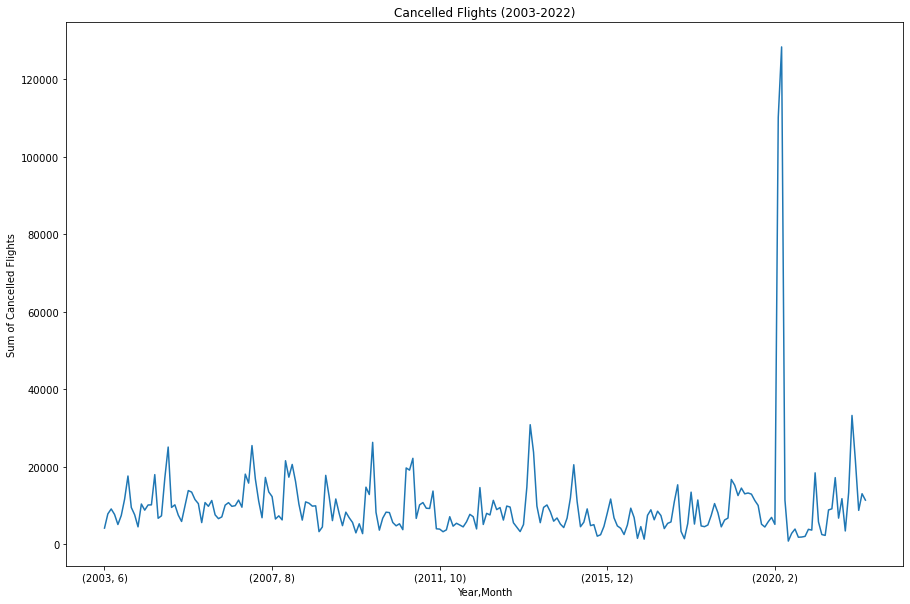

In [10]:
airline_cancels_df = airline_final_df.groupby(["Year", "Month"]).sum()["Arrival Cancelled"].plot(
    kind="line", title="Cancelled Flights (2003-2022)", ylabel="Sum of Cancelled Flights", figsize=(15,10))

In [11]:
# Calculate the most delays within a given month
max_delays = airline_final_df[["Delays"]].max()
airline_final_df[airline_final_df["Delays"].isin(max_delays)]

,Year,Month,Carrier,Airport,Flights,Delays,Carrier Ct,Weather Ct,Nas Ct,Security Ct,Late Aircraft Ct,Arrival Cancelled,Arrival Diverted,Arrival Delay,Carrier Delay,Weather Delay,Nas Delay,Security Delay,Late Aircraft Delay
282932,2005,7,Delta Air Lines Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",19043.0,6377.0,997.0,81.68,3962.83,5.52,1329.97,882.0,187.0,433687.0,83649.0,6867.0,238440.0,417.0,104314.0


In [13]:
airline_delayed_df = airline_final_df.groupby("Airport").sum().sort_values("Delays", ascending=False)

airline_delayed_df["Delay Pct"] = airline_delayed_df["Delays"] / airline_delayed_df["Flights"] * 100

airline_most_delayed_df = airline_delayed_df[(airline_delayed_df["Flights"] > 1000000)].sort_values(by="Delay Pct", ascending=False). \
    drop(["Year","Month","Carrier Ct","Weather Ct","Nas Ct","Late Aircraft Ct","Security Ct","Arrival Cancelled","Arrival Diverted"], axis=1)
airline_most_delayed_df.head()#[["Flights","Delays","Delay Pct","Arr Delay","Carrier Delay","Weather Delay","Nas Delay","Security Delay","Late Aircraft Delay"]]

,Flights,Delays,Arrival Delay,Carrier Delay,Weather Delay,Nas Delay,Security Delay,Late Aircraft Delay,Delay Pct
Airport,,,,,,,,,
"Newark, NJ: Newark Liberty International",2385120.0,670034.0,47297459.0,7153209.0,1663790.0,26802372.0,42649.0,11635439.0,28.092255
"New York, NY: LaGuardia",2120184.0,526977.0,33661573.0,6841139.0,1793434.0,16633156.0,26399.0,8367445.0,24.855248
"San Francisco, CA: San Francisco International",2766227.0,677788.0,43642990.0,9164339.0,1380983.0,19596147.0,51475.0,13450046.0,24.502255
"New York, NY: John F. Kennedy International",1955788.0,449914.0,29812161.0,7430162.0,1218921.0,11742767.0,58261.0,9362050.0,23.004232
"Chicago, IL: Chicago O'Hare International",5852102.0,1276665.0,89293573.0,19020089.0,3485381.0,36755442.0,69710.0,29962951.0,21.815495


In [15]:
airline_least_delayed_df = airline_most_delayed_df.sort_values(by="Delay Pct")
airline_least_delayed_df.head()

,Flights,Delays,Arrival Delay,Carrier Delay,Weather Delay,Nas Delay,Security Delay,Late Aircraft Delay,Delay Pct
Airport,,,,,,,,,
"Salt Lake City, UT: Salt Lake City International",2303511.0,325930.0,17522888.0,6615630.0,1144225.0,2933342.0,45861.0,6783830.0,14.149270
"Charlotte, NC: Charlotte Douglas International",2608671.0,423743.0,23459012.0,7569369.0,1105382.0,5684526.0,41787.0,9057948.0,16.243635
"Phoenix, AZ: Phoenix Sky Harbor International",3298414.0,536104.0,27523653.0,9630752.0,989129.0,5273259.0,85611.0,11544902.0,16.253387
"Minneapolis, MN: Minneapolis-St Paul International",2441487.0,402830.0,24361636.0,9060003.0,1757164.0,5505195.0,43584.0,7995690.0,16.499371
"Detroit, MI: Detroit Metro Wayne County",2542507.0,420022.0,25821105.0,9286751.0,1704668.0,5357846.0,41798.0,9430042.0,16.519994


<AxesSubplot:title={'center':'Delayed Flights (2003-2022)'}, xlabel='Year,Month', ylabel='Sum of Delayed Flights'>

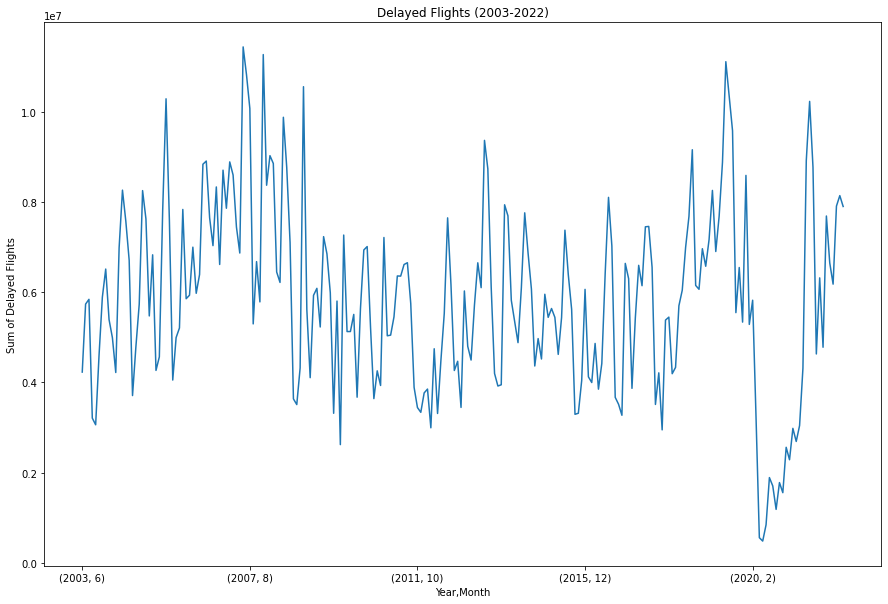

In [14]:
airline_final_df.groupby(["Year", "Month"]).sum()["Arrival Delay"].plot(
    kind="line", title="Delayed Flights (2003-2022)", ylabel="Sum of Delayed Flights", figsize=(15,10))
